## Import the zip file of the dataset

In [3]:
!wget http://cb.lk/covid_19

zsh:1: command not found: wget


## Unzip the file

In [4]:
!unzip covid_19

unzip:  cannot find or open covid_19, covid_19.zip or covid_19.ZIP.


## Import libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from  keras.models import *
from keras.preprocessing import image

## Creating the CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

## Creating train and test dataset

In [ ]:
train_datagen=image.ImageDataGenerator(
    rescale = 1./255,
    shear_range =0.25,
    zoom_range = 0.2,
    horizontal_flip=True,
)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


## Training

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
7/7 [==============================] - 24s 2s/step - loss: 0.8321 - accuracy: 0.6071 - val_loss: 0.6877 - val_accuracy: 0.8833
Epoch 2/10
7/7 [==============================] - 10s 1s/step - loss: 0.5582 - accuracy: 0.7232 - val_loss: 0.4564 - val_accuracy: 0.9167
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 0.4478 - accuracy: 0.8170 - val_loss: 0.4043 - val_accuracy: 0.9000
Epoch 4/10
7/7 [==============================] - 10s 2s/step - loss: 0.3137 - accuracy: 0.8884 - val_loss: 0.2553 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 0.2245 - accuracy: 0.9062 - val_loss: 0.2102 - val_accuracy: 0.9167
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.1658 - accuracy: 0.9554 - val_loss: 0.1096 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 0.1613 - accuracy: 0.9509 - val_loss: 0.0783 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

## Saving the model

In [ ]:
model.save('model.h5')

In [ ]:
from matplotlib import pyplot as plt

## Plotting the result

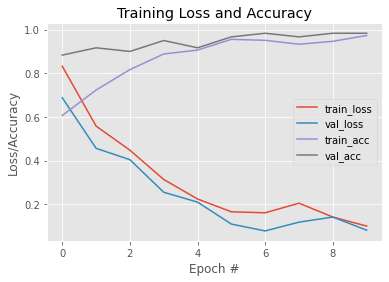

In [ ]:
N =10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

Thus, we were able to get a model of an accuracy of 98.33% on a train dataset of 244 X-Ray images.